In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
from simulation import *

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [28, 0, 21, 13, 0, 42, 41, 1, 19, 21] 
Slist :  [37]


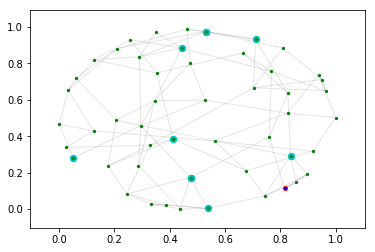

Starting infection


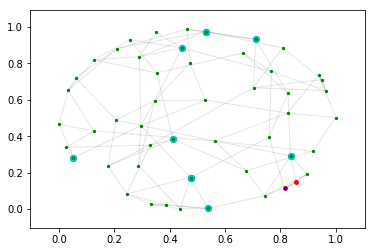

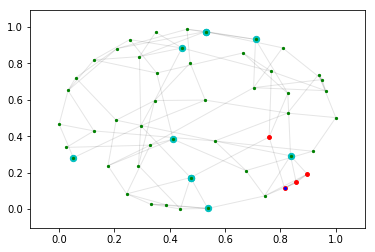

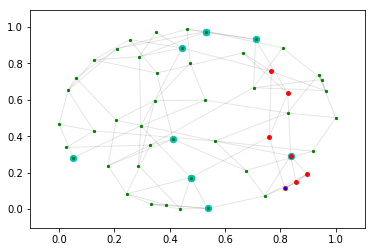

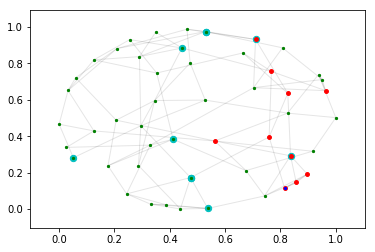

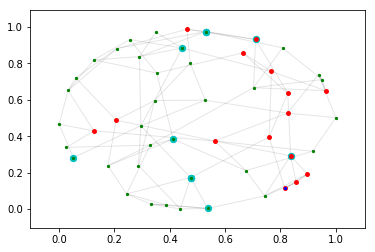

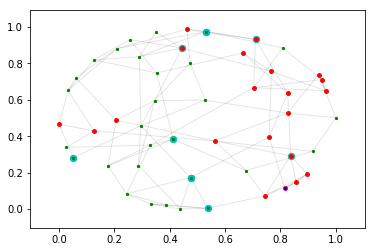

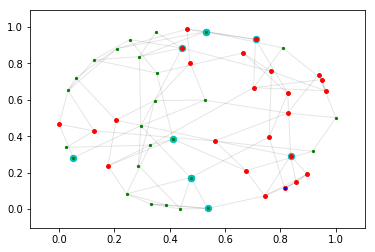

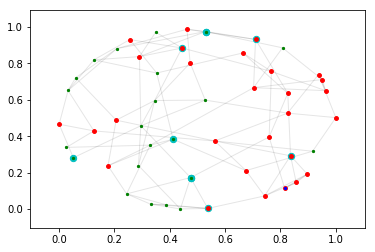

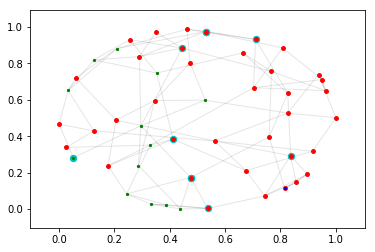

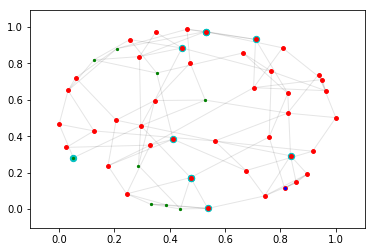

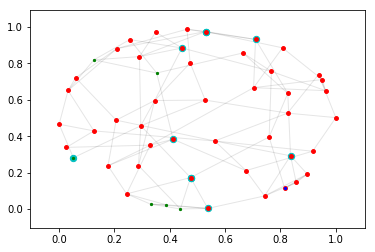

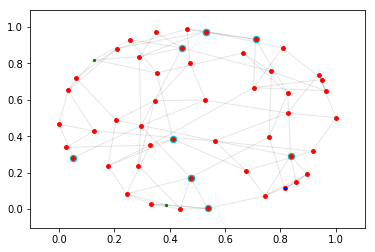

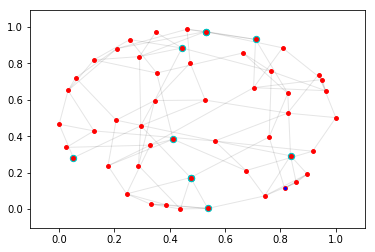

In [11]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 10
propagProba = 0.2
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)


print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

j=0

while(len(infected)< len(Graph.nodes())):
    #print("====================================================\n\n\n\n\n\n\n\n====================================================")

    #for i in Graph.nodes():
    #    if i in monitorsList:
    #        print("Node ",str(i),"\t",Graph.node[i])

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1

    #print(monitorTrigger)
    #printMonitorTrig(monitorTrigger)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

In [12]:
sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Real Source =  37
No sources identified

Monitoring Nodes :
Monitoring node number :  0 
	infected by rumor :  1 	at step :  9
Monitoring node number :  1 
	infected by rumor :  1 	at step :  4
Monitoring node number :  13 
	infected by rumor :  1 	at step :  9
Monitoring node number :  19 
	infected by rumor :  1 	at step :  8
Monitoring node number :  21 
	infected by rumor :  1 	at step :  9
Monitoring node number :  28 
	infected by rumor :  1 	at step :  6
Monitoring node number :  41 
	infected by rumor :  1 	at step :  3
Monitoring node number :  42 
	infected by rumor :  1 	at step :  12


Different sets
set()
{7, 8, 9, 42, 11, 12, 45, 44, 17, 18, 19, 20, 22, 30}
set()
set()
set()
set()
{32, 0, 35, 3, 6, 7, 43, 44, 13, 14, 47, 46, 17, 18, 49, 20, 21, 24, 26}
set()
